# Exploratory Data Analysis of Rossmann Pharmaceuticals Sales Data

## Imports

In [227]:
import numpy as np
import pandas as pd
import sys, os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

In [228]:
import sys
import os

# Add parent directory to sys.path




In [229]:

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from df_selector import *
from df_cleaner import *
from df_visualizer import *

In [230]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

## Reading Data

In [231]:
# create a FileHandler object
file_handler = FileHandler()

In [267]:
# reading the store csv file
store_df = pd.read_csv(r'D:\project\src\data\store.csv')
store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [275]:
# reading the sales training csv file
train_df = pd.read_csv(r"D:\project\src\data\train2.csv")
train_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## General Statistics

### store_df

In [276]:
# number of elements in the store df
store_df.size

11150

In [277]:
# rows and columns in the df
store_df.shape

(1115, 10)

In [278]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### train_df

In [279]:
# number of elements in the train df
train_df.size

9154881

In [280]:
# rows and columns in the df
train_df.shape

(1017209, 9)

In [281]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


## Missing Values

### store_df

In [282]:
percent_missing_values(store_df)

The dataset contains 21.01 % missing values.


In [283]:
missing_df = missing_values_table(store_df)

Your selected dataframe has 10 columns.
There are 6 columns that have missing values.


In [284]:
missing_df

,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,544,48.79,float64
Promo2SinceYear,544,48.79,float64
PromoInterval,544,48.79,object
CompetitionOpenSinceMonth,354,31.75,float64
CompetitionOpenSinceYear,354,31.75,float64
CompetitionDistance,3,0.27,float64


From the missing table we can recognize two groups with a pattern, the first 3 columns and the next 2 columns. Columns in each group have the same number of missing values. This indicates that if we investigate deeper we might get some insight.

Let's see the row number of rows with missing values in general then in each group.

In [285]:
# number of rows with missing values for the whole dataset
count_missing_rows(store_df)

750 rows(67.26%) contain atleast one missing value.


In [286]:
# number of rows with missing values for group 1 (Promo2SinceWeek, Promo2SinceYear, and PromoInterval)
count_missing_rows(store_df[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']])

544 rows(48.79%) contain atleast one missing value.


In [287]:
# number of rows with missing values for group 2 (CompetitionOpenSinceMonth, and CompetitionOpenSinceYear)
count_missing_rows(store_df[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']])

354 rows(31.75%) contain atleast one missing value.


As guessed we have got an interesting insight. Each columuns in these groups have missing values in the same rows as their groupmates. These means the missing values in these groups appear at the same time as a cluster. From the column names and the data fields' description in the challange document we can understand that the values of the columns in each group share a common information. Let's investigate.

In [288]:
# dataframe containing the missing rows for columns in group 1
group1_df = store_df[store_df['Promo2SinceWeek'].isna()]
group1_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
22,23,d,a,4060.0,8.0,2005.0,0,NaN,NaN,NaN


We can see that the Promo2 column is 0 for the first 10 rows. From intution we can infer that if there is no promotion the values for the columns in gropu 1(Promo2SinceWeek, Promo2SinceYear, and PromoInterval) should be null. Let's prove it.

In [289]:
# all unique values for each column
unique_values_df(group1_df)

,Column,Unique values
0,Store,"[1, 758, 741, 742, 747, 751, 755, 757, 760, 4,..."
1,StoreType,"[a, d, c, b]"
2,Assortment,"[a, c, b]"
3,CompetitionDistance,"[250.0, 140.0, 50.0, 2640.0, 30.0, 420.0, 720...."
4,CompetitionOpenSinceMonth,"[9.0, 4.0, 11.0, 3.0, 12.0, 10.0, 7.0, 6.0, 2...."
5,CompetitionOpenSinceYear,"[2013.0, 2012.0, 2014.0, 2009.0, 2010.0, 2005...."
6,Promo2,[0]
7,Promo2SinceWeek,[]
8,Promo2SinceYear,[]
9,PromoInterval,[]


In [290]:
group1_df['Promo2'].value_counts()

Promo2
0    544
Name: count, dtype: int64

All 544 values are 0. Now let's check the count of 0 in the Promo2 column for the whole store dataset.

In [291]:
store_df['Promo2'].value_counts()

Promo2
1    571
0    544
Name: count, dtype: int64

Yes, we are right. All rows with 0 value in their Promo2 columns have null values in the columns Promo2SinceWeek, Promo2SinceYear, and PromoInterval.

Now let's impute the missing values in the columns Promo2SinceWeek and Promo2SinceYear with 0 to convey the meaning of absence since year and week can't be 0. For PromoInterval we should dig deeper what kind of data it holds since its data type is object.

In [292]:
# check the exact data type of the object
pd.api.types.infer_dtype(store_df['PromoInterval'])

'string'

In [293]:
# all the unique values 
store_df['PromoInterval'].value_counts()

PromoInterval
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: count, dtype: int64

For the column PromoInterval, we will impute it with '0,0,0,0' as the other values follow list-type format containing four months. So inorder to impute these columns we should first investigate if the values we will insert exist in each column as this will oppose our intention.

In [294]:
store_df[store_df['Promo2SinceWeek'] == 0].shape

(0, 10)

In [295]:
store_df[store_df['Promo2SinceYear'] == 0].shape

(0, 10)

In [296]:
store_df[store_df['PromoInterval'] == '0,0,0,0'].shape

(0, 10)

Since the values don't appear in these columns, let's fill the missing values by them.

In [297]:
fix_missing_value(store_df, ['Promo2SinceWeek', 'Promo2SinceYear'], 0)

544 missing values in the column Promo2SinceWeek have been replaced by 0.
544 missing values in the column Promo2SinceYear have been replaced by 0.


In [298]:
fix_missing_value(store_df, ['PromoInterval'], '0,0,0,0')

544 missing values in the column PromoInterval have been replaced by 0,0,0,0.


Now it's time for the second group (i.e CompetitionOpenSinceMonth and CompetitionOpenSinceYear).

In [299]:
# dataframe containing the missing rows for columns in group 1
group2_df = store_df[store_df['CompetitionOpenSinceMonth'].isna()]
group2_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,0.0,0.0,"0,0,0,0"
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
25,26,d,a,2300.0,NaN,NaN,0,0.0,0.0,"0,0,0,0"
28,29,d,c,2170.0,NaN,NaN,0,0.0,0.0,"0,0,0,0"
31,32,a,a,2910.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
39,40,a,a,180.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
40,41,d,c,1180.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"


In [300]:
# all unique values for each column in the dataframe
unique_values_df(group2_df)

,Column,Unique values
0,Store,"[12, 853, 767, 766, 764, 762, 757, 756, 742, 7..."
1,StoreType,"[a, d, c, b]"
2,Assortment,"[c, a, b]"
3,CompetitionDistance,"[250.0, 2410.0, 50.0, 210.0, 840.0, 220.0, 150..."
4,CompetitionOpenSinceMonth,[]
5,CompetitionOpenSinceYear,[]
6,Promo2,"[1, 0]"
7,Promo2SinceWeek,"[0.0, 40.0, 14.0, 45.0, 31.0, 22.0, 5.0, 1.0, ..."
8,Promo2SinceYear,"[0.0, 2013.0, 2011.0, 2009.0, 2012.0, 2014.0, ..."
9,PromoInterval,"[0,0,0,0, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Ma..."


I can't see any pattern with the other columns. But from the column names and the data fields' description in the challange document we can understand that if CompetitionOpenSinceMonth and CompetitionOpenSinceYear are null it means there was already a competition when the store was opened. So we need impute the missing values in a meaningful way. Before doing that we will hold this meaning of an already existing competition in a separate column named CompetitionBeforeStoreOpened so that we can make use of this information in our analysis and prediction. This column will hold values of 0 and 1, 0 indicating the absence of competition at the time the store was opened and 1 indicating the presence of competition at the time the store was opened.

In [301]:
# deriving new column
store_df['CompetitionBeforeStoreOpened'] = store_df['CompetitionOpenSinceYear'].apply(lambda x: 1 if np.isnan(x) else 0)
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0",0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,"0,0,0,0",0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"0,0,0,0",0
...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,"0,0,0,0",0
1112,1113,a,c,9260.0,NaN,NaN,0,0.0,0.0,"0,0,0,0",1
1113,1114,a,c,870.0,NaN,NaN,0,0.0,0.0,"0,0,0,0",1


Now we can impute the columns CompetitionOpenSinceMonth and CompetitionOpenSinceYear. So we will impute missing values in the column CompetitionOpenSinceYear and CompetitionOpenSinceMonth with its minimun value and 1 respectively. This kind of imputing assumes that the stores with missing values in these columns were opened after the first month of the minimum year value in the column CompetitionOpenSinceYear.

Let's find the minimum year value for CompetitionOpenSinceYear and impute the missing values.

In [302]:
min_year = store_df['CompetitionOpenSinceYear'].min()
min_year

1900.0

In [303]:
# impute the column CompetitionOpenSinceYear with 1900 and the column CompetitionOpenSinceMonth with 1
fix_missing_value(store_df, ['CompetitionOpenSinceYear'], min_year)
fix_missing_value(store_df, ['CompetitionOpenSinceMonth'], 1)

354 missing values in the column CompetitionOpenSinceYear have been replaced by 1900.0.
354 missing values in the column CompetitionOpenSinceMonth have been replaced by 1.


In [304]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0",0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,"0,0,0,0",0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"0,0,0,0",0
...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,"0,0,0,0",0
1112,1113,a,c,9260.0,1.0,1900.0,0,0.0,0.0,"0,0,0,0",1
1113,1114,a,c,870.0,1.0,1900.0,0,0.0,0.0,"0,0,0,0",1


Now we are left with missing values in the column CompetitionDistance. Let's see the rows containing these missing values.

In [305]:
temp_df = store_df[store_df['CompetitionDistance'].isna()]
temp_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened
290,291,d,a,NaN,1.0,1900.0,0,0.0,0.0,"0,0,0,0",1
621,622,a,c,NaN,1.0,1900.0,0,0.0,0.0,"0,0,0,0",1
878,879,d,a,NaN,1.0,1900.0,1,5.0,2013.0,"Feb,May,Aug,Nov",1


In [306]:
unique_values_df(temp_df)

,Column,Unique values
0,Store,"[291, 622, 879]"
1,StoreType,"[d, a]"
2,Assortment,"[a, c]"
3,CompetitionDistance,[]
4,CompetitionOpenSinceMonth,[1.0]
5,CompetitionOpenSinceYear,[1900.0]
6,Promo2,"[0, 1]"
7,Promo2SinceWeek,"[0.0, 5.0]"
8,Promo2SinceYear,"[0.0, 2013.0]"
9,PromoInterval,"[0,0,0,0, Feb,May,Aug,Nov]"


All rows with missing values in the column CompetitionDistance has a value of 1 in the column CompetitionBeforeStoreOpened. But this doesn't give us much information why the CompetitionDistance is null. But from common sense I guess this is because the competitions for these stores are very far away and have almost no impact on these stores that they weren't measured when collecting the data. For this reason, I will impute this values with the maximum competition distance.

In [307]:
max_dist = store_df['CompetitionDistance'].max()
max_dist

75860.0

In [308]:
fix_missing_value(store_df, ['CompetitionDistance'], max_dist)

3 missing values in the column CompetitionDistance have been replaced by 75860.0.


In [309]:
# final check for missing values
percent_missing_values(store_df)

The dataset contains 0.0 % missing values.


### train_df

In [310]:
percent_missing_values(train_df)

The dataset contains 0.0 % missing values.


We are lucky to have no missing values in this dataset as it contains more than a million rows. This is a rare thing to happen in the real world.

## Data Types

### store_df

Let's check if there are columns with mixed data types.

In [311]:
show_cols_mixed_dtypes(store_df)

None of the columns contain mixed types.


In [313]:
store_df.dtypes

Store                             int64
StoreType                        object
Assortment                       object
CompetitionDistance             float64
CompetitionOpenSinceMonth       float64
CompetitionOpenSinceYear        float64
Promo2                            int64
Promo2SinceWeek                 float64
Promo2SinceYear                 float64
PromoInterval                    object
CompetitionBeforeStoreOpened      int64
dtype: object

In [314]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0",0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,"0,0,0,0",0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"0,0,0,0",0


As we can see from the dataframe above StoreType, Assortment and PromoInterval hold string values. Note that even though PromoInterval holds list values, the are enclosed in string literals. We will convert the data types of these three columns to string. Converting PromoInterval to string is convenient for further processing elements in each value.

In [315]:
# get the columns with object data type
string_columns = store_df.select_dtypes(include='object').columns.tolist()
string_columns

['StoreType', 'Assortment', 'PromoInterval']

In [316]:
convert_to_string(store_df, string_columns)

We also know that the columns CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, and Promo2SinceYear contain week, month and year information which can't be float. So we will change the data type of these columns to int64.

In [317]:
convert_to_int(store_df, ['CompetitionOpenSinceMonth',  'CompetitionOpenSinceYear',
        'Promo2SinceWeek', 'Promo2SinceYear'])

In [318]:
store_df.dtypes

Store                                    int64
StoreType                       string[python]
Assortment                      string[python]
CompetitionDistance                    float64
CompetitionOpenSinceMonth                int64
CompetitionOpenSinceYear                 int64
Promo2                                   int64
Promo2SinceWeek                          int64
Promo2SinceYear                          int64
PromoInterval                   string[python]
CompetitionBeforeStoreOpened             int64
dtype: object

In [319]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened
0,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0
1,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",0
2,3,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",0
3,4,c,c,620.0,9,2009,0,0,0,"0,0,0,0",0
4,5,a,a,29910.0,4,2015,0,0,0,"0,0,0,0",0


### train_df

Let's check if there are columns with mixed data types.

In [320]:
show_cols_mixed_dtypes(train_df)

         Column      Data type
0  StateHoliday  mixed-integer


So StateHoliday needs more investigation of the datatypes it contain. Let's look at the unique values.

In [321]:
train_df['StateHoliday'].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [322]:
train_df['StateHoliday'].value_counts().index

Index(['0', 0, 'a', 'b', 'c'], dtype='object', name='StateHoliday')

Here 0 is represented as an integer and a string. Since there are other string values we will convert the  StateHoliday column into string.

In [323]:
convert_to_string(train_df, ['StateHoliday'])

In [324]:
train_df.dtypes

Store                     int64
DayOfWeek                 int64
Date                     object
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday     string[python]
SchoolHoliday             int64
dtype: object

In [325]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


By observing the columns we can realize that the Date column actually contain datetime values even though its data type is object. So we will convert it to datetime data type.

In [326]:
convert_to_datetime(train_df, ['Date'])

In [327]:
train_df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday     string[python]
SchoolHoliday             int64
dtype: object

## Duplicates

### store_df

In [328]:
# search for duplicate rows and drop them
drop_duplicates(store_df)

No duplicate rows were found.


Since store is the id that uniquely identifies each record, there should be no duplicates. Let's check that.

In [329]:
store_df.duplicated(subset=['Store']).all()

False

We are safe. No two rows in our dataset contain the same Store value.

### train_df

In [330]:
# search for duplicate rows and drop them
drop_duplicates(train_df)

No duplicate rows were found.


Since Store and Date are the columns that uniquely identify each record, there should be no duplicates. We can't have duplicate data for a store with the same date. Let's check whether such cases exist.

In [331]:
train_df.duplicated(subset=['Store', 'Date']).all()

False

We are safe. No two rows in our dataset contain the same combination of Store and Date values.

## Feature Engineering

### train_df

Even though we have a date column it will be complex to query our data based on week, month, year, etc. So inorder tp gain complex insights easily, I have derived the following features.

In [332]:
train_df['Year'] = train_df['Date'].apply(lambda x: x.year)
train_df['Month'] = train_df['Date'].apply(lambda x: x.month)
train_df['DayOfMonth'] = train_df['Date'].apply(lambda x: x.day)
train_df['WeekOfYear'] = train_df['Date'].apply(lambda x: x.weekofyear)
train_df['weekday'] = train_df['DayOfWeek'].apply(lambda x: 0 if (x in [6, 7]) else 1)

In [333]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  string        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  DayOfMonth     1017209 non-null  int64         
 12  WeekOfYear     1017209 non-null  int64         
 13  weekday        1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(12), s

In [334]:
train_df.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,WeekOfYear,weekday
604301,757,1,2014-01-06,0,0,0,1,a,0,2014,1,6,2,1
832258,139,6,2013-06-15,4254,344,1,0,0,0,2013,6,15,24,0
823062,978,1,2013-06-24,6261,968,1,0,0,0,2013,6,24,26,1
609117,1113,4,2014-01-02,6609,798,1,0,0,1,2014,1,2,1,1
803027,1013,5,2013-07-12,3335,432,1,0,0,0,2013,7,12,28,1
360319,621,4,2014-08-21,6558,874,1,1,0,0,2014,8,21,34,1
655128,294,4,2013-11-21,5967,801,1,1,0,0,2013,11,21,47,1
712977,163,1,2013-09-30,7387,916,1,0,0,1,2013,9,30,40,1
860886,892,2,2013-05-21,7658,885,1,0,0,1,2013,5,21,21,1
853703,399,1,2013-05-27,5694,558,1,1,0,1,2013,5,27,22,1


### store_df

In [335]:
def getMonth(month_list, index):
    months = ['0', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
    month_list = month_list.split(',')
    month = month_list[index]
    return months.index(month)

In [336]:
# split the PromoInterval column into 4 columns
store_df['PromoInterval0'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 0)))
store_df['PromoInterval1'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 1)))
store_df['PromoInterval2'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 2)))
store_df['PromoInterval3'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 3)))

In [337]:
store_df.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
540,541,a,c,650.0,7,1990,0,0,0,"0,0,0,0",0,0,0,0,0
1112,1113,a,c,9260.0,1,1900,0,0,0,"0,0,0,0",1,0,0,0,0
692,693,d,a,450.0,1,1900,1,40,2011,"Jan,Apr,Jul,Oct",1,1,4,7,10
238,239,d,c,610.0,1,1900,0,0,0,"0,0,0,0",1,0,0,0,0
644,645,a,a,90.0,1,1900,1,45,2009,"Feb,May,Aug,Nov",1,2,5,8,11
547,548,d,c,3760.0,2,2009,0,0,0,"0,0,0,0",0,0,0,0,0
797,798,a,a,9560.0,4,2001,0,0,0,"0,0,0,0",0,0,0,0,0
848,849,c,c,5000.0,1,1900,0,0,0,"0,0,0,0",1,0,0,0,0
769,770,a,c,100.0,4,2015,0,0,0,"0,0,0,0",0,0,0,0,0
560,561,d,a,14300.0,1,1900,0,0,0,"0,0,0,0",1,0,0,0,0


## Merging dataframes and Saving Data

In [338]:
# save the clean dataframe to a csv file
#file_handler.to_csv(train_df, '../data/train.csv')
#file_handler.to_csv(store_df, '../data/store.csv')

In [339]:
# merging store_df and train_df
df = pd.merge(train_df, store_df, how='inner', on='Store')
df.shape

(1017209, 28)

In [340]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,WeekOfYear,weekday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,7,30,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,7,29,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,7,28,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,7,27,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0,0


In [203]:
# save merged dataframe
#file_handler.to_csv(df, r'D:\project\src\data\train.csv')

In [341]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'DayOfMonth',
       'WeekOfYear', 'weekday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'CompetitionBeforeStoreOpened',
       'PromoInterval0', 'PromoInterval1', 'PromoInterval2', 'PromoInterval3'],
      dtype='object')

Here I saved the file in dvc as version 3(v3).

## Univariate Analysis

### Non-Graphical Univariate Analysis

In [342]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Store,1017209.0,558.429727,1.0,280.0,558.0,838.0,1115.0,321.908651
DayOfWeek,1017209.0,3.998341,1.0,2.0,4.0,6.0,7.0,1.997391
Date,1017209,2014-04-11 01:30:42.846061824,2013-01-01 00:00:00,2013-08-17 00:00:00,2014-04-02 00:00:00,2014-12-12 00:00:00,2015-07-31 00:00:00,NaN
Sales,1017209.0,5773.818972,0.0,3727.0,5744.0,7856.0,41551.0,3849.926175
Customers,1017209.0,633.145946,0.0,405.0,609.0,837.0,7388.0,464.411734
Open,1017209.0,0.830107,0.0,1.0,1.0,1.0,1.0,0.375539
Promo,1017209.0,0.381515,0.0,0.0,0.0,1.0,1.0,0.485759
SchoolHoliday,1017209.0,0.178647,0.0,0.0,0.0,0.0,1.0,0.383056
Year,1017209.0,2013.832292,2013.0,2013.0,2014.0,2014.0,2015.0,0.777396
Month,1017209.0,5.846762,1.0,3.0,6.0,8.0,12.0,3.326097


### StoreType

In [343]:
# unique value counts
counts_df = store_df['StoreType'].value_counts()
counts_df

StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: Int64

In [344]:
plotly_plot_pie(store_df, 'StoreType')

### Assortment

In [345]:
# unique value counts
counts_df = store_df['Assortment'].value_counts()
counts_df

Assortment
a    593
c    513
b      9
Name: count, dtype: Int64

In [346]:
plotly_plot_pie(store_df, 'Assortment')

### CompetitionDistance

In [347]:
plotly_plot_hist(store_df, 'CompetitionDistance')

### Promo2

In [348]:
# unique value counts
counts_df = store_df['Promo2'].value_counts()
counts_df

Promo2
1    571
0    544
Name: count, dtype: int64

### CompetitionBeforeStoreOpened

In [349]:
# unique value counts
counts_df = store_df['CompetitionBeforeStoreOpened'].value_counts()
counts_df

CompetitionBeforeStoreOpened
0    761
1    354
Name: count, dtype: int64

### DayOfWeek

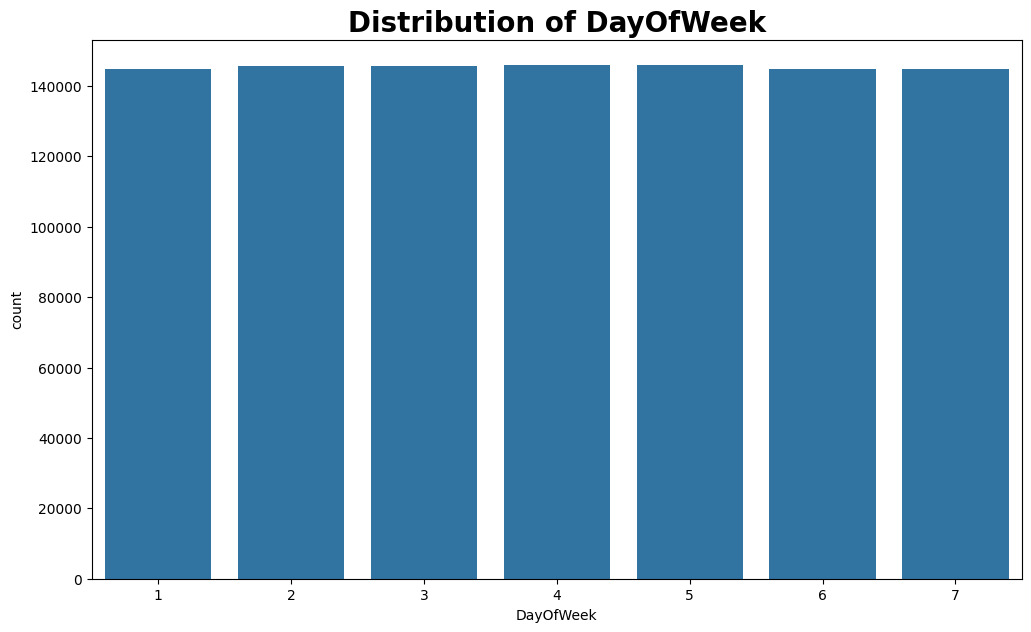

In [350]:
plot_count(train_df, 'DayOfWeek')

### Sales

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

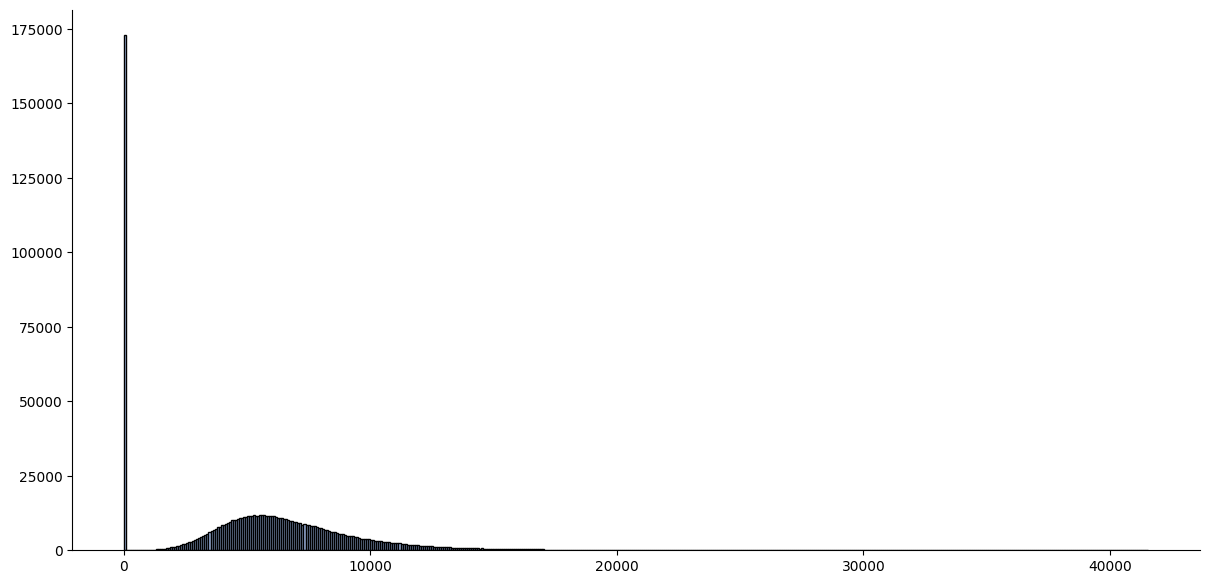

In [351]:
plot_hist(train_df, 'Sales')

### Customers

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

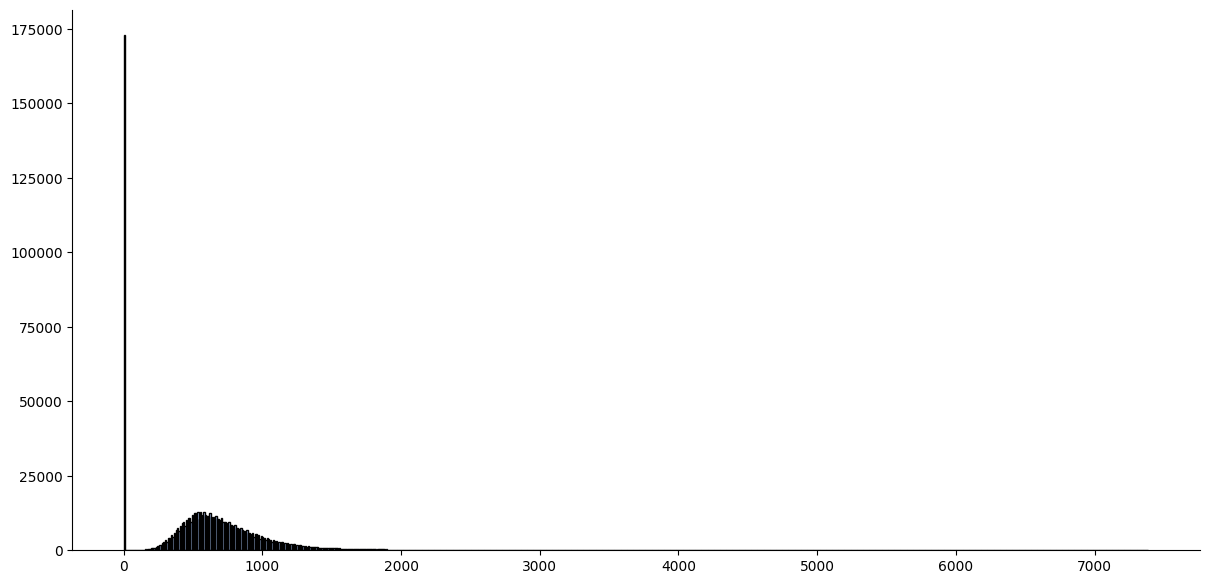

In [215]:
plot_hist(train_df, 'Customers')

### Open

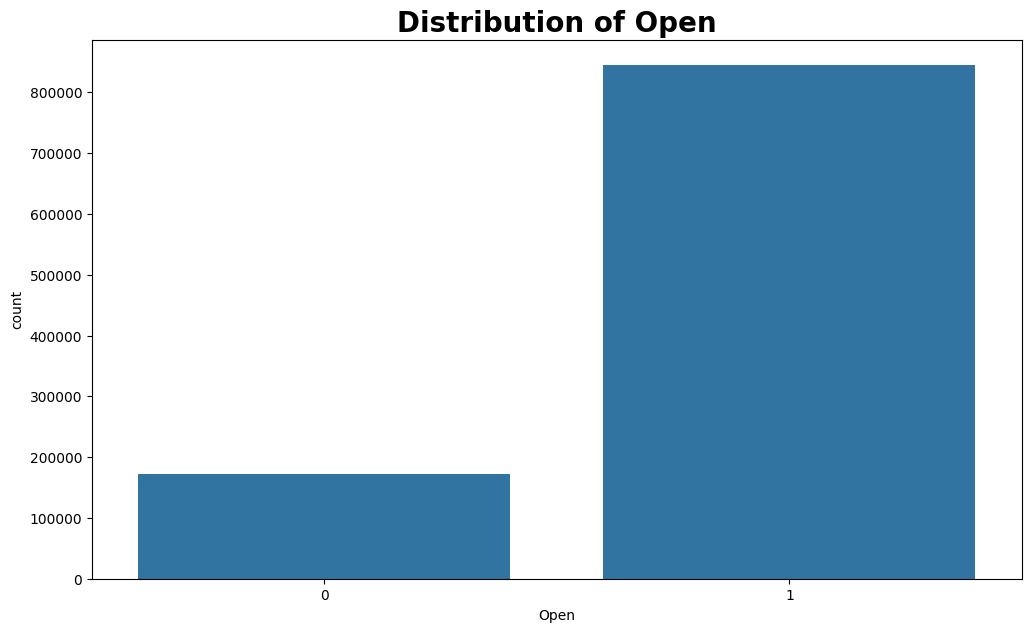

In [352]:
plot_count(train_df, 'Open')

### Promo

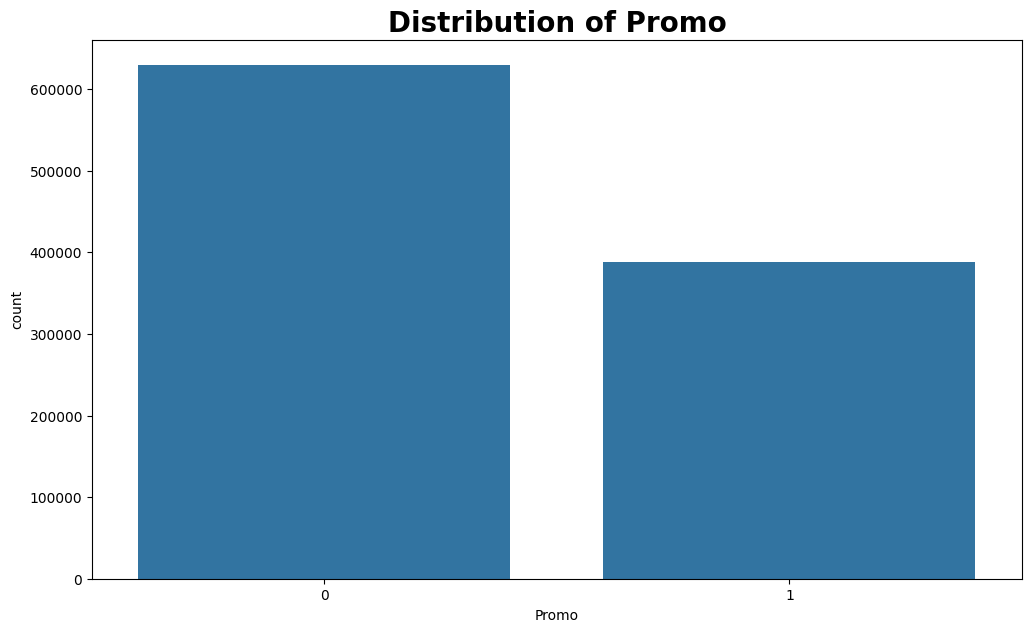

In [353]:
plot_count(train_df, 'Promo')

### StateHoliday

In [354]:
# unique value counts
counts_df = train_df['StateHoliday'].value_counts()
counts_df

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: Int64

### SchoolHoliday

In [355]:
# unique value counts
counts_df = train_df['SchoolHoliday'].value_counts()
counts_df

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

## Bivariate Analysis

### StateHoliday and Sales

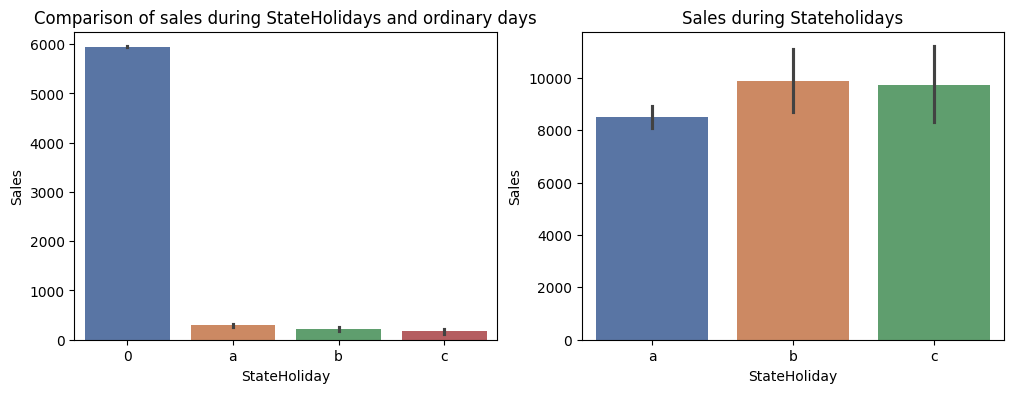

In [356]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

# holidays and no_holidays
sns.barplot(x='StateHoliday', y='Sales', data=train_df, ax=axis1,palette="deep").set_title('Comparison of sales during StateHolidays and ordinary days')

# holidays only
mask = (train_df["StateHoliday"] != "0") & (train_df["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=train_df[mask], ax=axis2,palette="deep").set_title('Sales during Stateholidays')
plt.show()

### SchoolHoliday vs sales and Customers

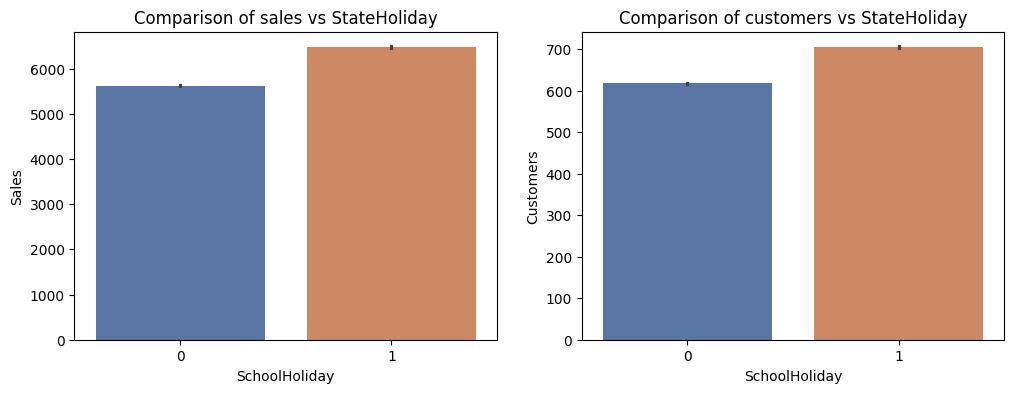

In [357]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

sns.barplot(x='SchoolHoliday', y='Sales', data=train_df, ax=axis1,palette="deep").set_title('Comparison of sales vs StateHoliday')
sns.barplot(x='SchoolHoliday', y='Customers', data=train_df, ax=axis2,palette="deep").set_title('Comparison of customers vs StateHoliday')
plt.show()

### StoreType vs Sales and Customers

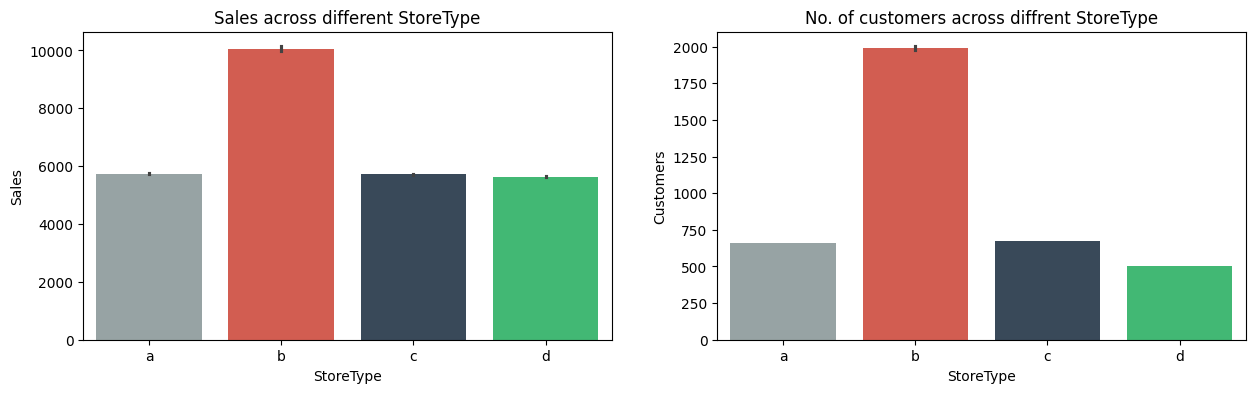

In [358]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType', y='Sales', data=df, ax=axis1, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('Sales across different StoreType')
sns.barplot(x='StoreType', y='Customers', data=df, ax=axis2, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('No. of customers across diffrent StoreType')
plt.show()

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'DayOfMonth',
       'WeekOfYear', 'weekday', 'StoreType_x', 'Assortment_x',
       'CompetitionDistance_x', 'CompetitionOpenSinceMonth_x',
       'CompetitionOpenSinceYear_x', 'Promo2_x', 'Promo2SinceWeek_x',
       'Promo2SinceYear_x', 'PromoInterval_x',
       'CompetitionBeforeStoreOpened_x', 'PromoInterval0_x',
       'PromoInterval1_x', 'PromoInterval2_x', 'PromoInterval3_x',
       'StoreType_y', 'Assortment_y', 'CompetitionDistance_y',
       'CompetitionOpenSinceMonth_y', 'CompetitionOpenSinceYear_y', 'Promo2_y',
       'Promo2SinceWeek_y', 'Promo2SinceYear_y', 'PromoInterval_y',
       'CompetitionBeforeStoreOpened_y', 'PromoInterval0_y',
       'PromoInterval1_y', 'PromoInterval2_y', 'PromoInterval3_y'],
      dtype='object')

### Assortment vs Sales and Customers

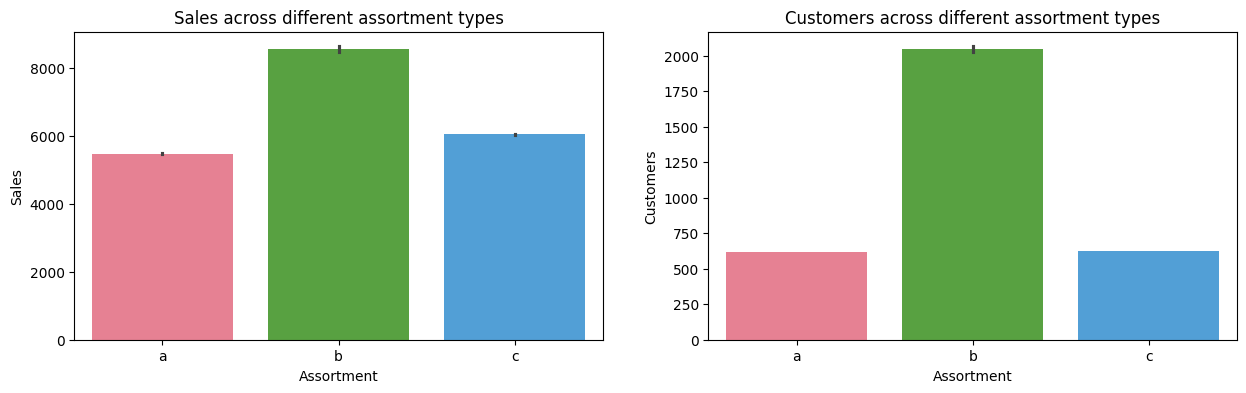

In [359]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=df, palette = 'husl', order=['a','b','c'], ax=axis1).set_title('Sales across different assortment types')
sns.barplot(x='Assortment', y='Customers', data=df, palette = 'husl', order=['a','b','c'], ax=axis2).set_title('Customers across different assortment types')
plt.show()

### DayOfWeek vs Sales and Customers

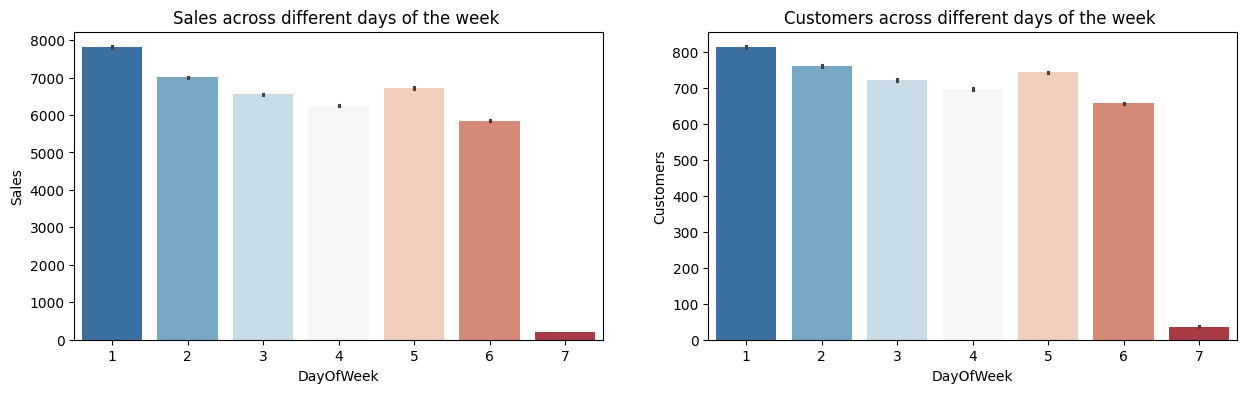

In [360]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='DayOfWeek', y='Sales', data=train_df, palette = 'RdBu_r', ax=axis1).set_title('Sales across different days of the week ')
sns.barplot(x='DayOfWeek', y='Customers', data=train_df, palette = 'RdBu_r', ax=axis2).set_title('Customers across different days of the week ')
plt.show()

### Promo vs Sales and Customers

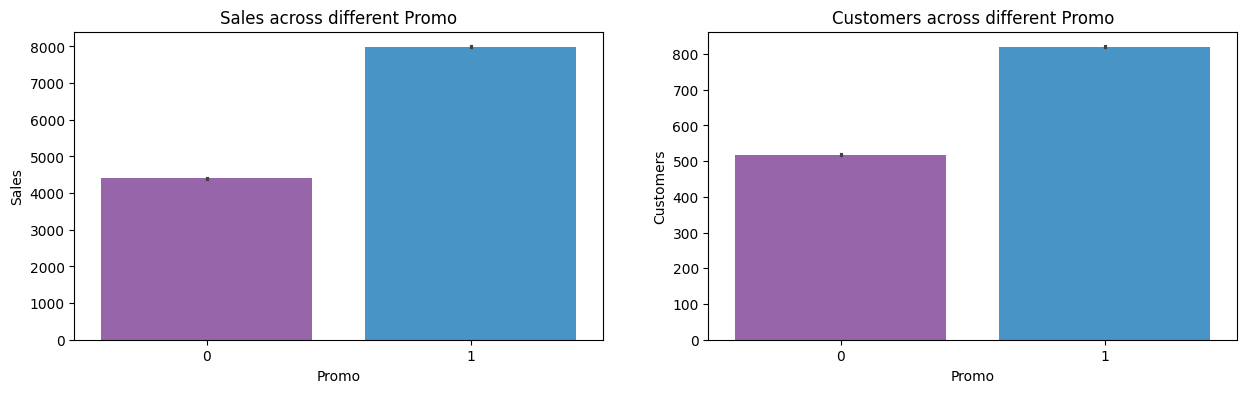

In [361]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo', y='Sales', data=train_df, palette = flatui, ax=axis1).set_title('Sales across different Promo')
sns.barplot(x='Promo', y='Customers', data=train_df, ax=axis2,  palette = flatui).set_title('Customers across different Promo')
plt.show()

### Promo2 vs Sales and Customers

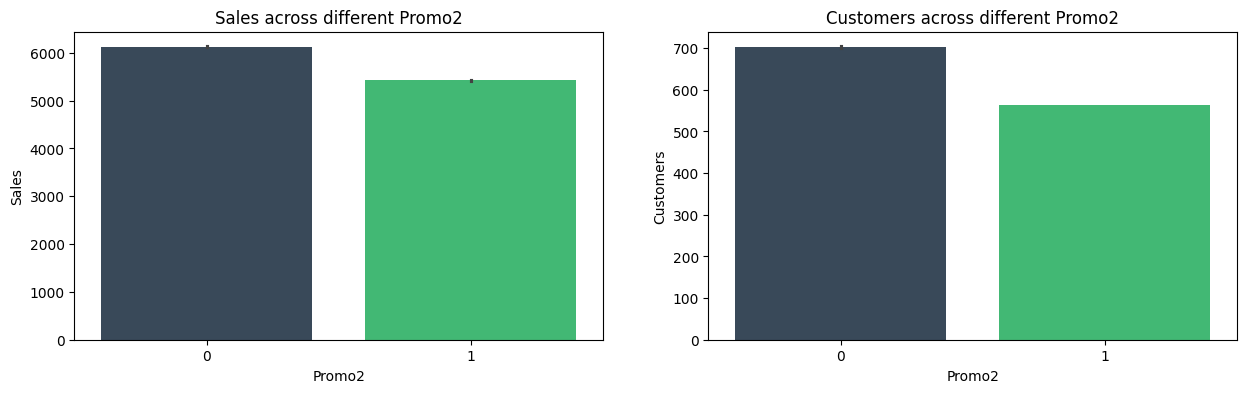

In [362]:
flatui = [ "#34495e", "#2ecc71"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo2', y='Sales', data=df, ax=axis1, palette = flatui).set_title('Sales across different Promo2')
sns.barplot(x='Promo2', y='Customers', data=df, ax=axis2, palette = flatui).set_title('Customers across different Promo2')
plt.show()

### PromoInterval vs Sales and Customers

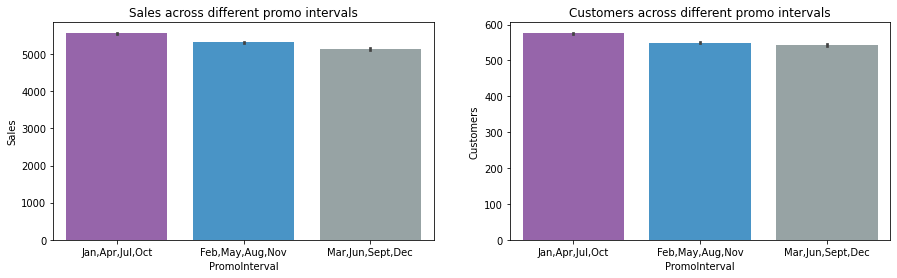

In [ ]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

# values with promo2 only
mask = (df["Promo2"] != 0)

sns.barplot(x='PromoInterval', y='Sales', data=df[mask], ax=axis1, palette = flatui).set_title('Sales across different promo intervals')
sns.barplot(x='PromoInterval', y='Customers', data=df[mask], ax=axis2, palette = flatui).set_title('Customers across different promo intervals')
plt.show()

### Open and DayOfWeek

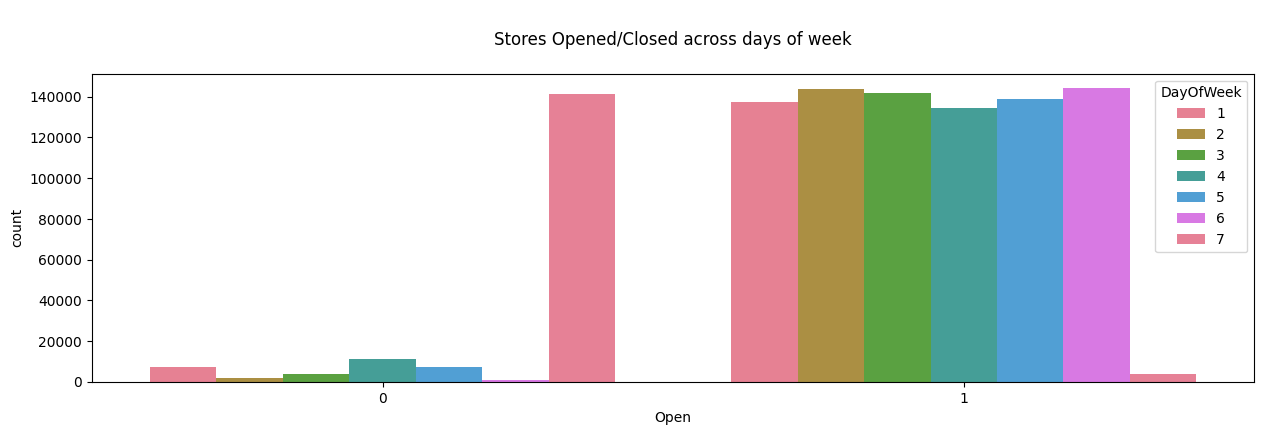

In [363]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=train_df,palette="husl", ax=axis1).set_title('\nStores Opened/Closed across days of week\n')
plt.show()

### Sales and Month

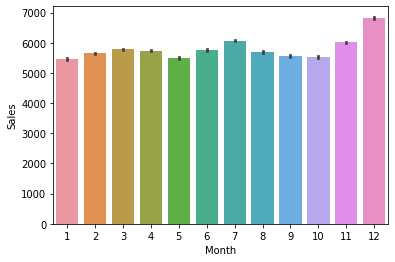

In [ ]:
sns.barplot(x='Month', y='Sales', data=df)
plt.show()

### CompetitionDistance and Sales

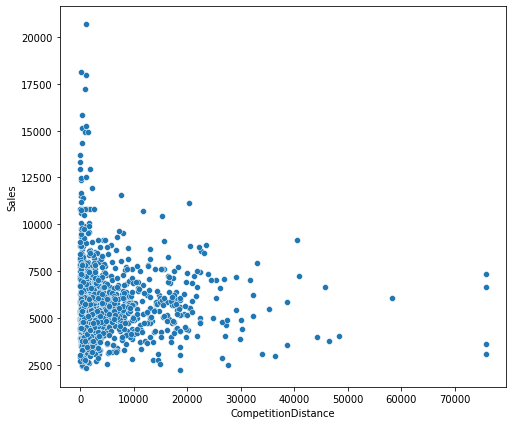

In [ ]:
a = df.groupby('Store').agg({
    'CompetitionDistance': 'mean',
    'Sales': 'mean',
    'Customers': 'mean'
})
plt.subplots(figsize = (8, 7))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=a)
plt.show()

In [ ]:
df.info()

## Correlation Analysis

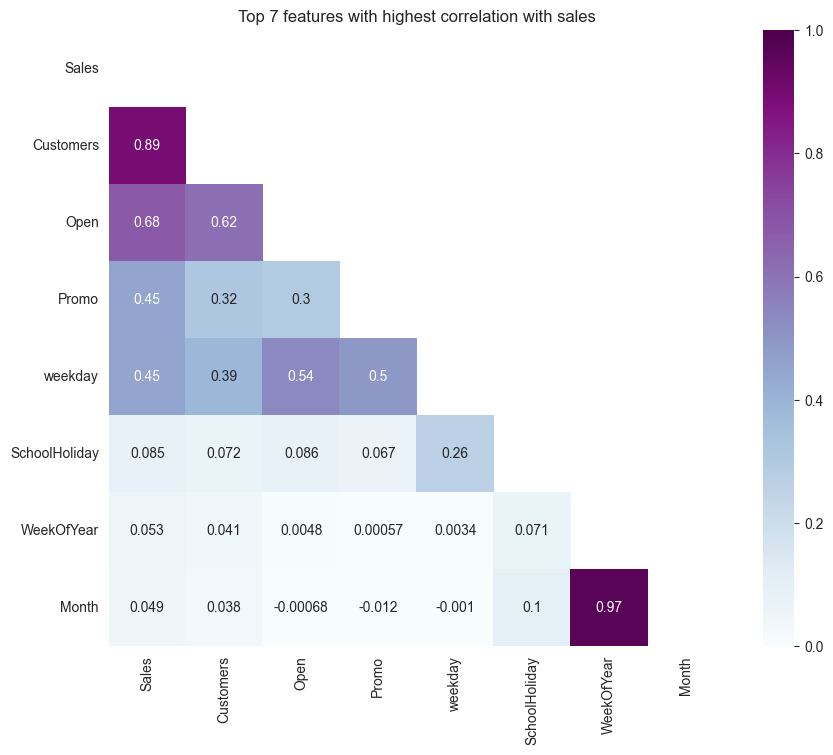

In [365]:

# Exclude non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=[np.number])

# Get the top 8 features most correlated with 'Sales'
f_most_correlated = numeric_df.corr().nlargest(8, 'Sales')['Sales'].index

# Calculate the correlation matrix for these features
f_correlation = numeric_df[f_most_correlated].corr()

# Generate a mask for the upper triangle
f_mask = np.zeros_like(f_correlation)
f_mask[np.triu_indices_from(f_mask)] = True

# Plot the heatmap
with sns.axes_style("white"):
    f_fig, f_ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=1, square=True,
                annot=True, annot_kws={"size": 10}, cmap="BuPu", ax=f_ax)
    plt.title('Top 7 features with highest correlation with sales')
    plt.show()


## Filtering Data and Answering Business Questions

### Distribution of promotion in the training and test datasets

In [366]:
# reading test data
test_df = file_handler.read_csv("../data/test.csv")
test_df.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [367]:
df2 = pd.merge(test_df, store_df, how='inner', on='Store')
df2.shape

(41088, 22)

In [ ]:
#file_handler.to_csv(df, r'D:\project\src\data\test.csv')

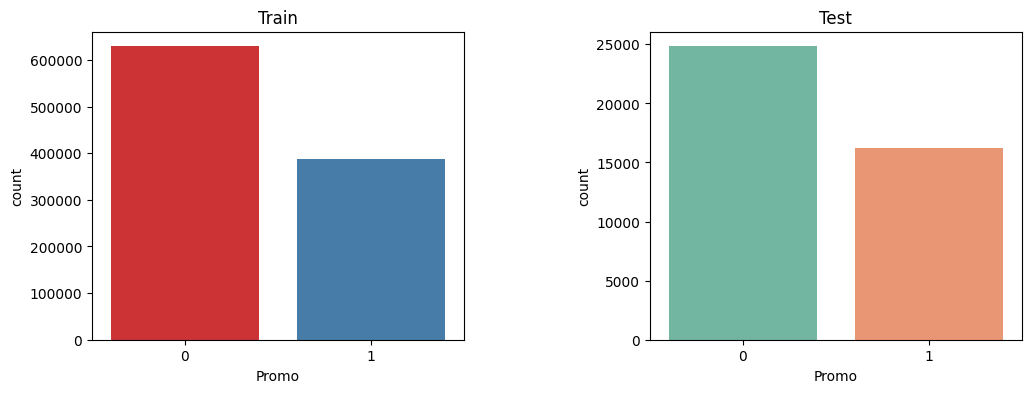

In [369]:
# Define color palettes for train and test count plots
train_palette = sns.color_palette("Set1")
test_palette = sns.color_palette("Set2")

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
ax[0].set_title("Train")
sns.countplot(x='Promo', data=train_df, ax=ax[0], palette=train_palette)
ax[1].set_title("Test")
sns.countplot(x='Promo', data=test_df, ax=ax[1], palette=test_palette)
fig.subplots_adjust(wspace=0.5)
plt.show()

The distribution of promotion is almost the same in both datasets.

### Monthly sales trend per store type

In [370]:
store_type_a = df[df.StoreType == 'a']
store_type_b = df[df.StoreType == 'b']
store_type_c = df[df.StoreType == 'c']
store_type_d = df[df.StoreType == 'd']

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

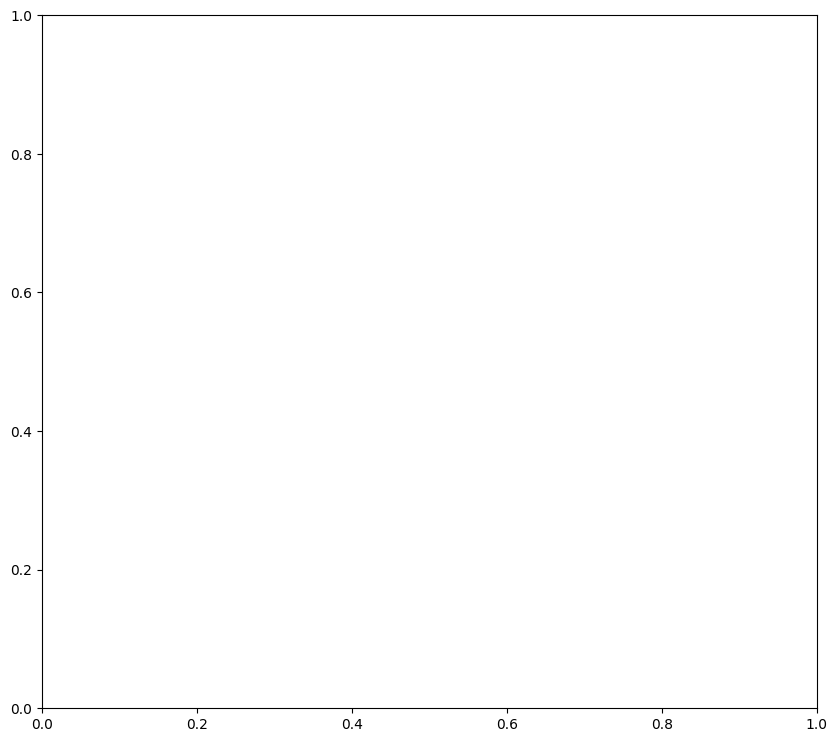

In [371]:
plt.subplots(figsize = (10, 9))
sns.lineplot(x = store_type_a.Month, y = store_type_a.Sales, label="Store Type A")
sns.lineplot(x = store_type_b.Month, y = store_type_b.Sales, label="Store Type B")
sns.lineplot(x = store_type_c.Month, y = store_type_c.Sales, label="Store Type C")
sns.lineplot(x = store_type_d.Month, y = store_type_d.Sales, label="Store Type D")
plt.show()

### Monthly sales per StoreType and Promo

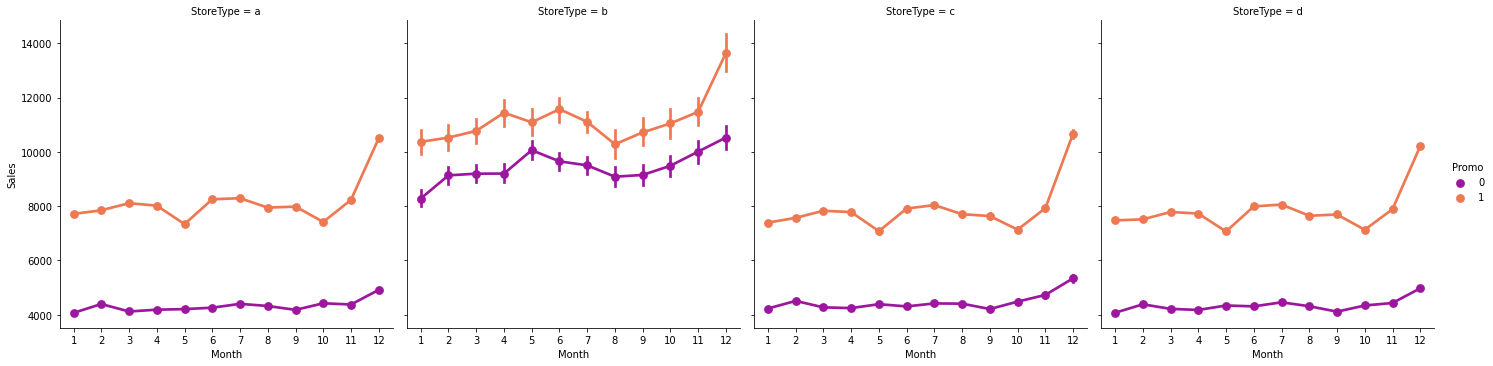

In [ ]:
sns.factorplot(data = df, x = 'Month', y = "Sales",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order=['a','b','c', 'd'],
               title='Promotion impact on sales per store types')
plt.show()

### Monthly customers per StoreType and Promo

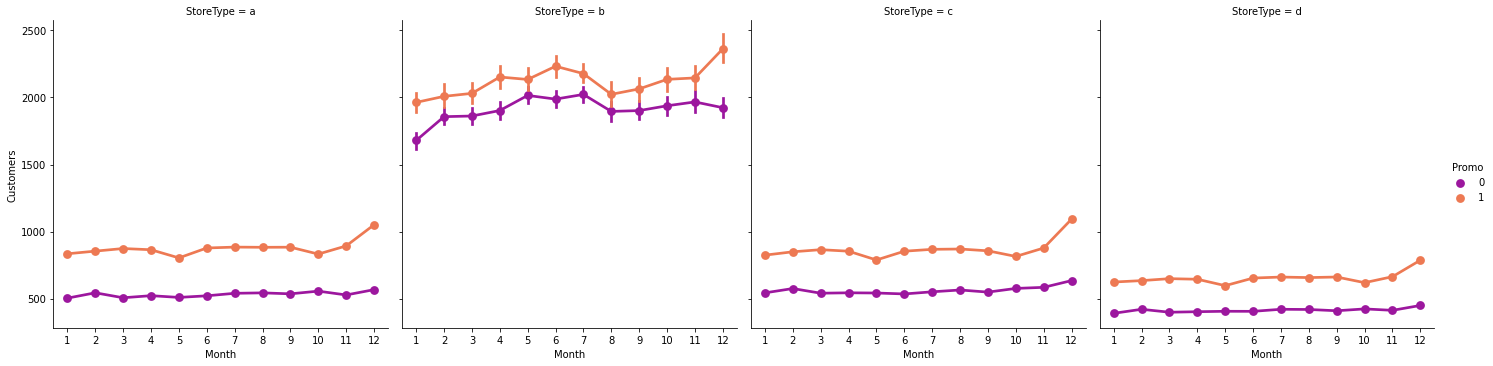

In [ ]:
sns.factorplot(data = df, x = 'Month', y = "Customers",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order=['a','b','c', 'd'],
               title='Promotion impact on sales per store types')
plt.show()

### Monthly sales per Assortment and Promo

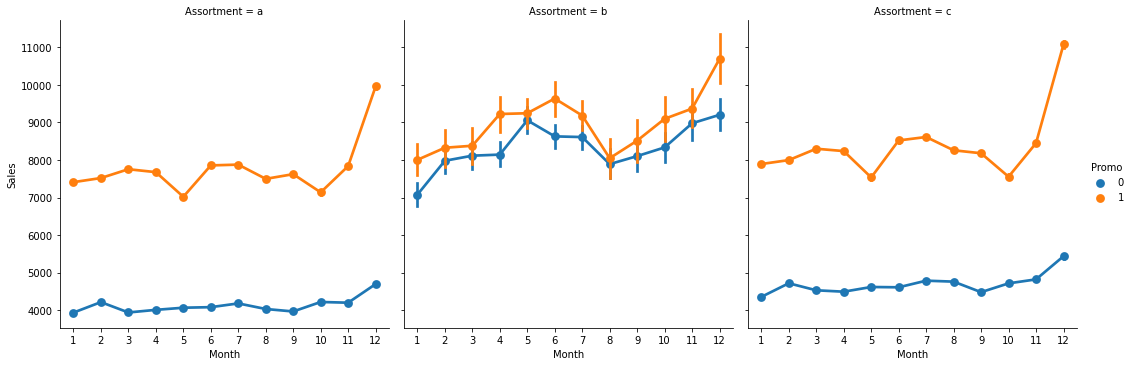

In [ ]:
sns.factorplot(data = df, x = 'Month', y = 'Sales', col='Assortment', hue='Promo', col_order=['a','b','c'])
plt.show()

### Monthly customers per Assortment and Promo

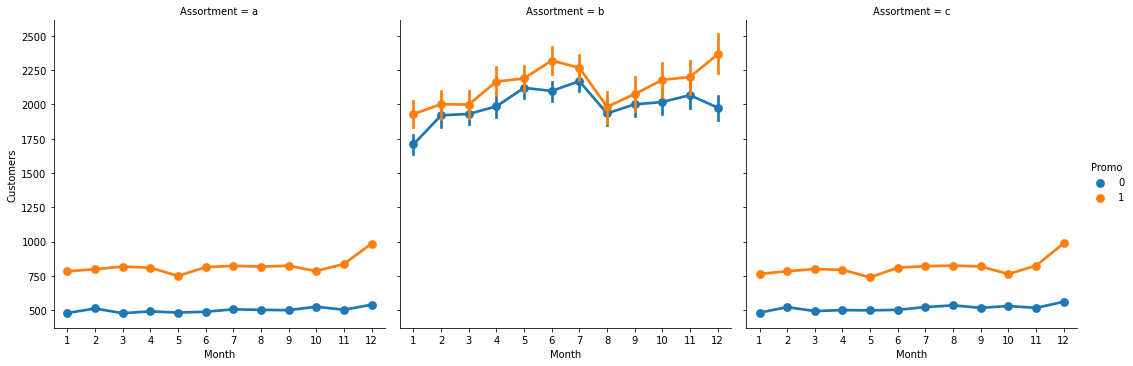

In [ ]:
sns.factorplot(data = df, x = 'Month', y = 'Customers', col='Assortment', hue='Promo', col_order=['a','b','c'])
plt.show()

### Sales of stores open per DayOfWeek and StoreType

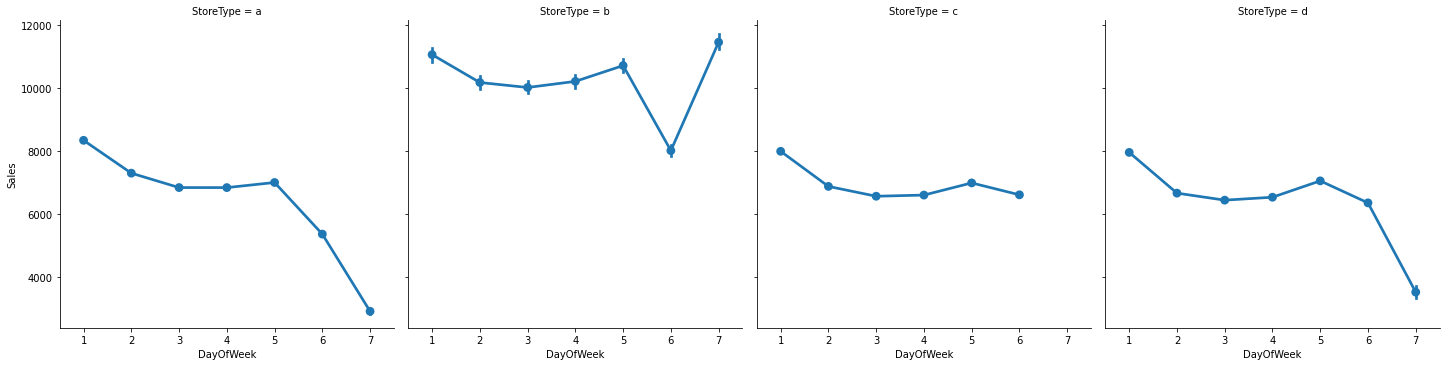

In [ ]:
# stores that are open only
mask = (df["Open"] != 0)

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Sales', col='StoreType', col_order=['a','b','c', 'd'])
plt.show()

### Customers of stores open per DayOfWeek and StoreType

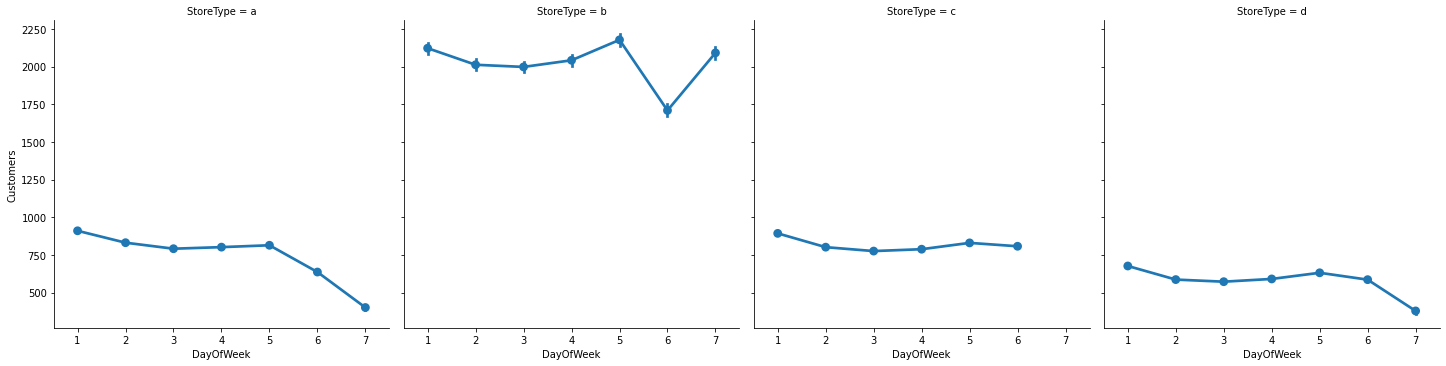

In [ ]:
# stores that are open only
mask = (df["Open"] != 0)

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Customers', col='StoreType', col_order=['a','b','c', 'd'])
plt.show()

### Sales of stores open per DayOfWeek and Assortment

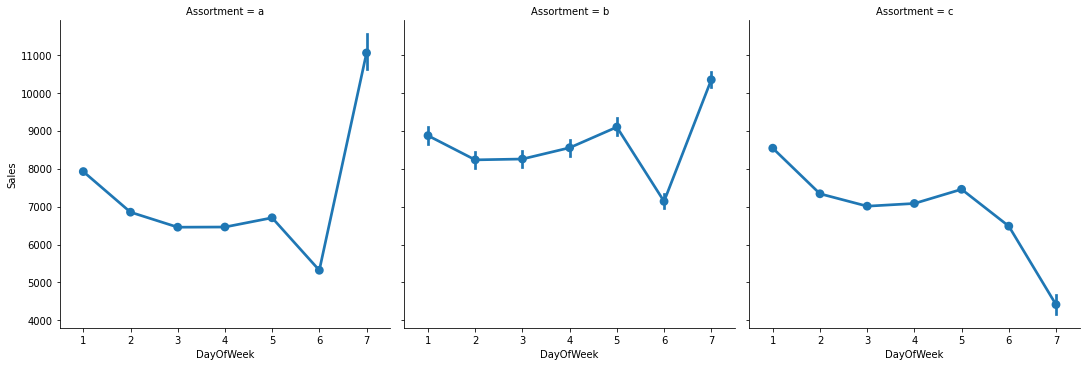

In [ ]:
# stores that are open only
mask = (df["Open"] != 0)

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Sales', col='Assortment', col_order=['a','b','c'])
plt.show()

### Customers of stores open per DayOfWeek and Assortment

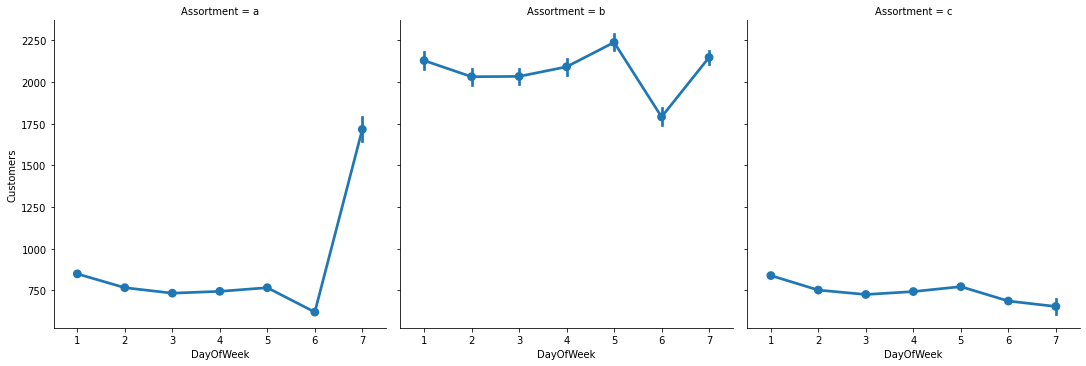

In [ ]:
# stores that are open only
mask = (df["Open"] != 0)

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Customers', col='Assortment', col_order=['a','b','c'])
plt.show()

### Sales before, after and during Christmas

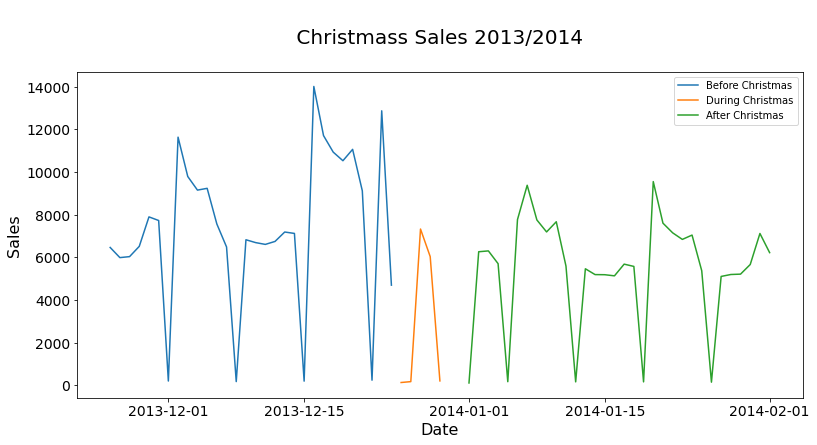

In [ ]:
before_index = (train_df["Date"] >= pd.to_datetime("2013-11-25")) & (train_df["Date"] < pd.to_datetime("2013-12-25"))
before_xmass = train_df[before_index].groupby("Date").agg({"Sales": "mean"})

during_index = (train_df["Date"] >= pd.to_datetime("2013-12-25")) & (train_df["Date"] < pd.to_datetime("2013-12-30"))
during_xmass = train_df[during_index].groupby("Date").agg({"Sales": "mean"})

after_index = (train_df["Date"] >= pd.to_datetime("2014-01-01")) & (train_df["Date"] < pd.to_datetime("2014-02-02"))
after_xmass = train_df[after_index].groupby("Date").agg({"Sales": "mean"})


plt.figure(figsize=(13, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before Christmas')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During Christmas')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After Christmas')

plt.title("\n Christmass Sales 2013/2014 \n", size=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Sales", fontsize=16)
plt.show()

## Conclusions of EDA

* The most selling and crowded store type is b.
* The most selling and crowded assortment is b.
* Sales is highly correlated to customers.
* For all stores, promotion leads to increase in Sales and Customers. But promotions have low  impact on store type b and assortment b when comparing to the other store types and assortments. So promotions should be applied more in the other store types and assortments.
* Store type b is the most opened store type on all weekdays and has its highest sales on sundays than the other days. 
* Assortment a and b are the most opened assortments on all weekdays and have their highest sales on sundays than the other days. The number of cusomers increase dramatically on sundays for assortment a while it is similar with other week days for assortment b.
* Sales are increased during Chirstmas week, especially the week before. This might be due to the fact that people buy more beauty products or some common medicines for precaution during Christmas celebration.
* Stores with the smallest competition distance have the highest sales. This indicates that the stores are located at city center or near hospitals. Even though having large distance between competitors is ideally considered great for sales, stores located at city centers will still get more sales regardless of competitors distance as there are more customers at city centers.

In [ ]:
#df3 = pd.read_csv(r"D:\project\src\data\test.csv")

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 28 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Store                         1017209 non-null  int64  
 1   DayOfWeek                     1017209 non-null  int64  
 2   Date                          1017209 non-null  object 
 3   Sales                         1017209 non-null  int64  
 4   Customers                     1017209 non-null  int64  
 5   Open                          1017209 non-null  int64  
 6   Promo                         1017209 non-null  int64  
 7   StateHoliday                  1017209 non-null  object 
 8   SchoolHoliday                 1017209 non-null  int64  
 9   Year                          1017209 non-null  int64  
 10  Month                         1017209 non-null  int64  
 11  DayOfMonth                    1017209 non-null  int64  
 12  WeekOfYear                  

In [ ]:
#df3 = pd.read_csv(r'D:\project\features\train_features.csv')